In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

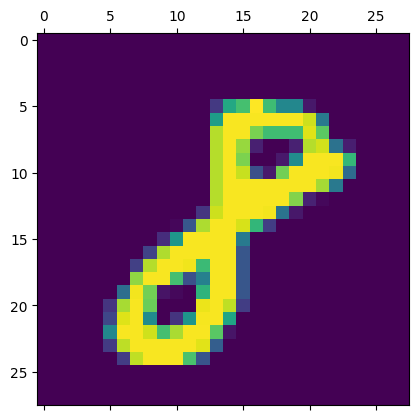

In [7]:
plt.matshow(X_train[31])

In [8]:
y_train[31]

8

In [12]:
X_train[31].shape

(28, 28)

In [15]:
x_train = X_train.reshape(len(X_train),28*28)
x_test = X_test.reshape(len(X_test),28*28)

In [16]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8615 - accuracy: 0.8388
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0652 - accuracy: 0.8771
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7277 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4710 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3773 - accuracy: 0.8845


In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2906 - accuracy: 0.8214
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8969 - accuracy: 0.8732
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6179 - accuracy: 0.8862
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4518 - accuracy: 0.8965
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3604 - accuracy: 0.9068


In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.9139


[0.3202006220817566, 0.9139000177383423]

In [29]:
np.argmax(model.predict(x_test)[0])

313/313 [==============================] - 0s 939us/step


7

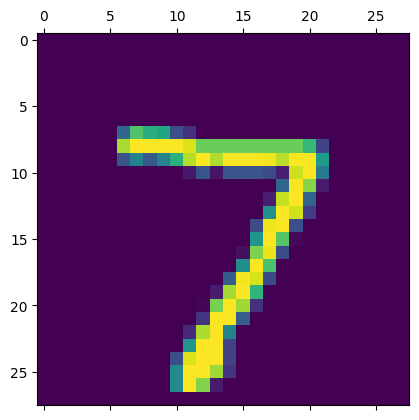

In [31]:
plt.matshow(X_test[0])

In [32]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [43]:
y_predicted_labels = [np.argmax(x) for x in y_predicted]

In [45]:
y_predicted_labels[:3]

[7, 2, 1]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    1,    0,    4,    8,    1,    3,    0],
       [   0, 1106,    2,    3,    0,    2,    4,    1,   17,    0],
       [  10,    5,  891,   23,   14,    0,   14,   22,   49,    4],
       [   4,    1,   20,  906,    0,   23,    4,   17,   26,    9],
       [   2,    1,    3,    1,  901,    1,   12,    1,   12,   48],
       [  12,    6,    2,   36,   12,  754,   19,   10,   32,    9],
       [  11,    3,    6,    1,    7,   14,  911,    1,    4,    0],
       [   2,   14,   22,    3,    8,    0,    0,  939,    4,   36],
       [   6,    8,    9,   15,    8,   23,   11,   14,  869,   11],
       [  10,    5,    3,   12,   32,    8,    0,   30,    9,  900]])>

<Axes: >

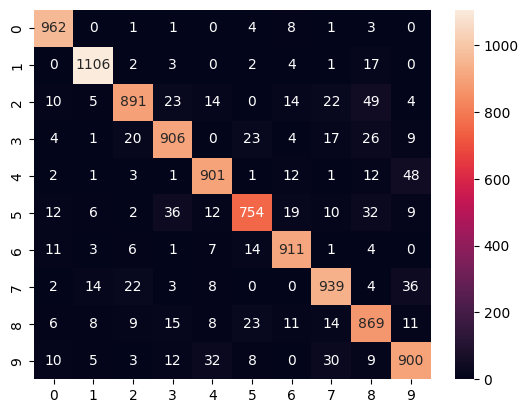

In [52]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")

In [54]:
model = keras.Sequential([
    keras.layers.Dense(392, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2093 - accuracy: 0.9381
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0838 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0297 - accuracy: 0.9904


In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9779


[0.07666687667369843, 0.9779000282287598]

313/313 [==============================] - 1s 2ms/step


<Axes: >

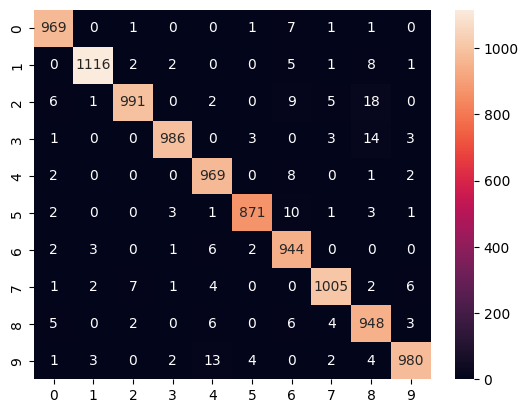

In [56]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(x) for x in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt="d")